**Import Important Libraries**

In [2]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
import xgboost as xgb

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
#Warnings - Ignore All
import warnings
warnings.simplefilter('ignore')

In [17]:
#Ignore All Warnings About Later Execution
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Data Collection**

In [15]:
train_values = pd.read_csv('./data/Training set values.csv')
train_labels = pd.read_csv('./data/Training set labels.csv')
test_values  = pd.read_csv('./data/Test set values.csv')

In [16]:
#
print('Train examples: ', len(train_values))

print('Test examples: ',  len(test_values))

Train examples:  59400
Test examples:  14850


In [ ]:
# print("Number of rows: "+str(full_data.shape[0]))
# print("Number of columns: "+str(full_data.shape[1]))

In [17]:
#
train_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [18]:
#
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

**Data Cleaning**

In [19]:
#Drop Redundant Columns
features_to_drop = ['id','date_recorded']

In [20]:
train_values = train_values.drop(features_to_drop, axis=1)  # Redundant with "year_first_hired"

*Missing Data Imputation*

In [22]:
#
nullseries = train_values.isnull().sum().sort_values(ascending=False)
nullseries[nullseries > 0]

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

In [23]:
train_numerical_features   = list(train_values.select_dtypes(exclude='object').columns)
train_categorical_features = list(train_values.select_dtypes(include='object').columns)

In [24]:
train_values[train_categorical_features]

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [1]:
#Imputing

imputer = SimpleImputer(strategy="median")

# Num_vars is the list of
train_values_num = train_values[train_numerical_features]

train_values_num = imputer.fit_transform(train_values_num)

NameError: name 'SimpleImputer' is not defined

In [33]:
# defining the imputer
cat_imputer = SimpleImputer(strategy='most_frequent')

# Num_vars is the list of
train_values_cat = train_values[train_categorical_features]

train_values_cat = cat_imputer.fit_transform(train_values_num)


Feature Scaling

In [34]:
#Encoding

ordinal_encoder = OrdinalEncoder()

train_values_cat_encoded = ordinal_encoder.fit_transform(train_values_cat)

In [35]:
#Scaling

train_values_num_scaled = StandardScaler().fit_transform(train_values_num)

In [36]:
#Back to DataFrame

train_values_cat_encoded_df = pd.DataFrame(train_values_cat_encoded)

train_values_num_scaled_df = pd.DataFrame(train_values_num_scaled)

**Feature Selection**

In [ ]:
 #!pip install featurewiz --ignore-installed --no-deps
 #!pip install xlrd --ignore-installed --no-deps 

In [ ]:
 #!pip install Pillow==9.0.0
 #!pip install lazytransform

In [ ]:
!pip install dask[dataframe] --upgrade

In [ ]:
from featurewiz import FeatureWiz

ModuleNotFoundError: ignored

In [ ]:

features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train, y_train)
X_test_selected = features.transform(X_test)
features.features  ### provides the list of selected features ###

**Feature Engineering**

**Distribution of Independent Variables**

In [37]:
y = train_labels['status_group']

In [ ]:
y

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [38]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**Data Splitting**

In [39]:
le = LabelEncoder()

Y  = le.fit_transform(train_labels['status_group'])

In [40]:
X  = pd.concat([train_values_num_scaled_df, train_values_cat_encoded_df], ignore_index=True, sort=False,axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3, random_state = 42)

**Data Modeling**

In [42]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

*Logistic Regression*

In [43]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [44]:
y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.5455266955266955
0.540628507295174


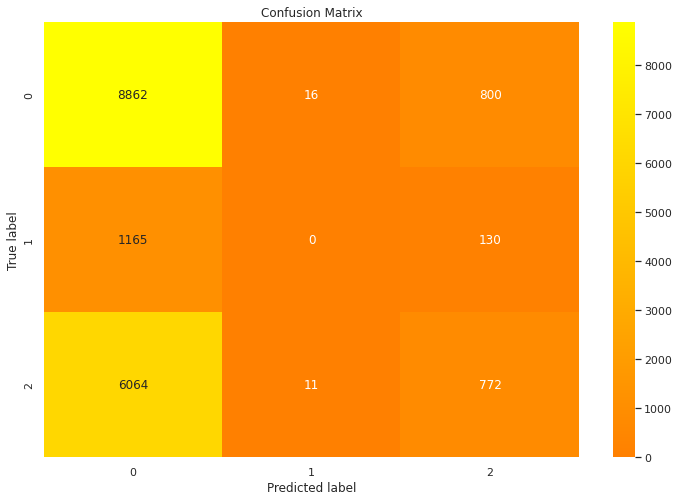

In [45]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

*Random Forest*

In [46]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.9857383357383357
0.7172278338945005


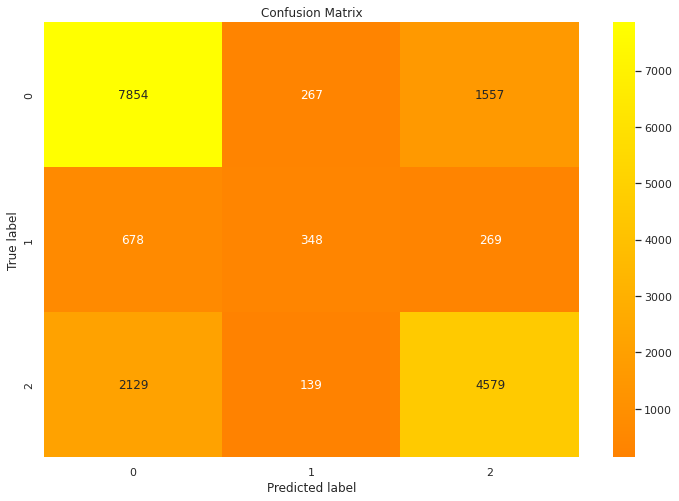

In [48]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

*XGBoost*

In [49]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [50]:
y_predict_train_xgb = xgb_cl.predict(X_train)
y_predict_test_xgb = xgb_cl.predict(X_test)

train_accuracy_score_xgb = accuracy_score(y_train, y_predict_train_xgb)
test_accuracy_score_xgb = accuracy_score(y_test, y_predict_test_xgb)

print(train_accuracy_score_xgb)
print(test_accuracy_score_xgb)

0.6512506012506013
0.6434904601571269


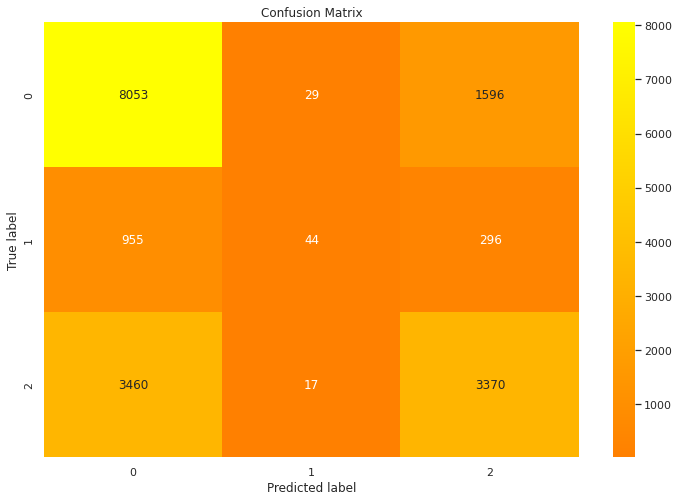

In [51]:
cm_xgb = confusion_matrix(y_test,y_predict_test_xgb)
draw_confusion_matrix(cm_xgb)

Imbalance Dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
x_smote , y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

In [ ]:
print('Resampple dataset shape:', Counter(y_smote))

Resampple dataset shape: Counter({0: 22581, 2: 22581, 1: 22581})


In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf  = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.9817700817700817
0.6905723905723906
